In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/sample_data/archive.zip -d /content/sample_data

Archive:  /content/sample_data/archive.zip
  inflating: /content/sample_data/gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png  
  inflating: /content/sample_data/gaussian_filtered_images/gaussian_filtered_images/Mild/00cb6555d108.png  
  inflating: /content/sample_data/gaussian_filtered_images/gaussian_filtered_images/Mild/0124dffecf29.png  
  inflating: /content/sample_data/gaussian_filtered_images/gaussian_filtered_images/Mild/01b3aed3ed4c.png  
  inflating: /content/sample_data/gaussian_filtered_images/gaussian_filtered_images/Mild/0369f3efe69b.png  
  inflating: /content/sample_data/gaussian_filtered_images/gaussian_filtered_images/Mild/03e25101e8e8.png  
  inflating: /content/sample_data/gaussian_filtered_images/gaussian_filtered_images/Mild/04ac765f91a1.png  
  inflating: /content/sample_data/gaussian_filtered_images/gaussian_filtered_images/Mild/059bc89df7f4.png  
  inflating: /content/sample_data/gaussian_filtered_images/gaussian_filtered_images/Mild/05a5

In [ ]:
from tensorflow import lite
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random, os
import cv2
import shutil
import keras
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
from imutils import paths
from sklearn.utils import shuffle

In [ ]:
df = pd.read_csv("/content/sample_data/train.csv")

diagnosis_binary = {
        0: 'No_DR',
        1: 'DR',
        2: 'DR',
        3: 'DR',
        4: 'DR'}

diagnosis_classes = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}


df["binary"] = df["diagnosis"].map(diagnosis_binary.get)
df["type"] = df["diagnosis"].map(diagnosis_classes.get)

In [ ]:
df.head()

,id_code,diagnosis,binary,type
0,000c1434d8d7,2,DR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,DR,Mild
3,002c21358ce6,0,No_DR,No_DR
4,005b95c28852,0,No_DR,No_DR


<Axes: >

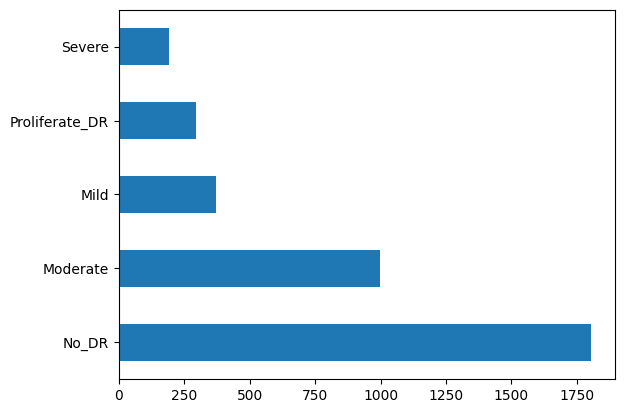

In [ ]:
df['type'].value_counts().plot(kind='barh')

<Axes: >

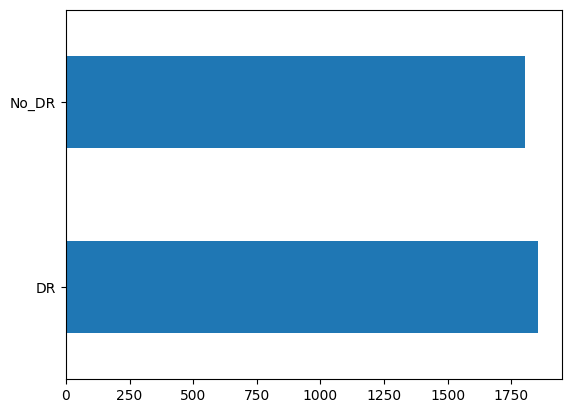

In [ ]:
df['binary'].value_counts().plot(kind='barh')

In [ ]:
data = []
labels = []
width,height=224,224

imagePaths = list(paths.list_images('/content/sample_data/gaussian_filtered_images'))

data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

data, labels = shuffle(data, labels)

print(data.shape)
print(labels.shape)

(3662, 224, 224, 3)
(3662, 5)


In [ ]:
data = data / 255.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=.2)

print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (2929, 224, 224, 3)
Test images: (733, 224, 224, 3)
Train label: (2929, 5)
Test label: (733, 5)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.2)

print("Train images:",x_train.shape)
print("Test images:",x_val.shape)
print("Train label:",y_train.shape)
print("Test label:",y_val.shape)

Train images: (2343, 224, 224, 3)
Test images: (586, 224, 224, 3)
Train label: (2343, 5)
Test label: (586, 5)


In [ ]:
from keras.models import Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras import layers

In [ ]:
Vgg16 = VGG16(include_top=False, input_shape= (224,224,3))

Vgg16.trainable=False

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
model = Sequential()
model.add(Vgg16)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64 , activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(32 , activation="relu"))
#model.add(Dropout(0.25))
model.add(Dense(5 , activation="sigmoid"))

model.compile( optimizer="adam" , loss="binary_crossentropy" , metrics="binary_accuracy" )

In [ ]:
callbacks = [EarlyStopping(monitor='val_binary_accuracy' , patience=10 , restore_best_weights=True)]

history = model.fit(x_train , y_train , epochs=50 , batch_size=64,
                    validation_data=(x_val,y_val), verbose=1 , callbacks = callbacks)

Epoch 1/50
37/37 [==============================] - 41s 582ms/step - loss: 0.3959 - binary_accuracy: 0.8458 - val_loss: 0.3013 - val_binary_accuracy: 0.8724
Epoch 2/50
37/37 [==============================] - 12s 338ms/step - loss: 0.2896 - binary_accuracy: 0.8860 - val_loss: 0.2793 - val_binary_accuracy: 0.8840
Epoch 3/50
37/37 [==============================] - 13s 353ms/step - loss: 0.2737 - binary_accuracy: 0.8915 - val_loss: 0.2779 - val_binary_accuracy: 0.8881
Epoch 4/50
37/37 [==============================] - 13s 355ms/step - loss: 0.2611 - binary_accuracy: 0.8927 - val_loss: 0.2665 - val_binary_accuracy: 0.8945
Epoch 5/50
37/37 [==============================] - 13s 356ms/step - loss: 0.2551 - binary_accuracy: 0.8978 - val_loss: 0.2616 - val_binary_accuracy: 0.8928
Epoch 6/50
37/37 [==============================] - 13s 360ms/step - loss: 0.2437 - binary_accuracy: 0.9000 - val_loss: 0.2560 - val_binary_accuracy: 0.8952
Epoch 7/50
37/37 [==============================] - 13s 36

In [ ]:
def plot_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["binary_accuracy"]
  val_accuracy = history.history["val_binary_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

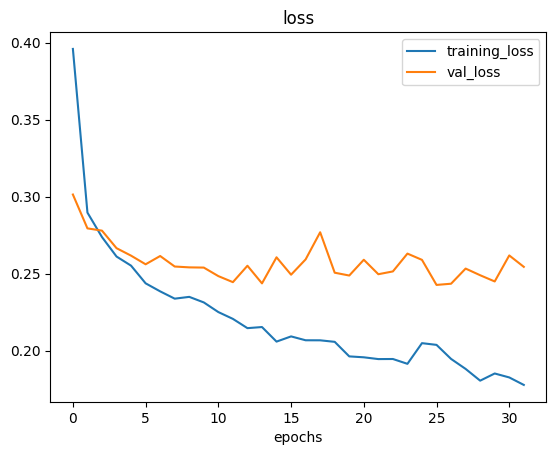

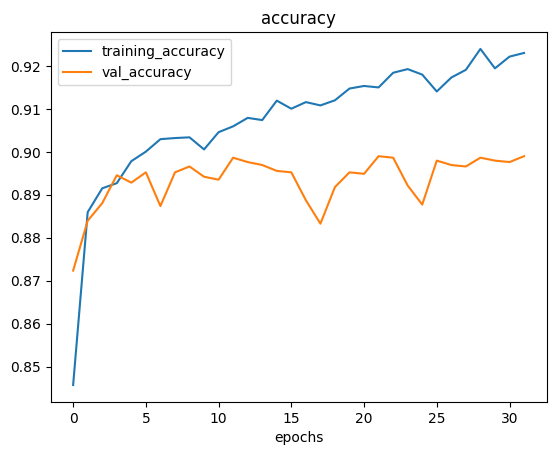

In [ ]:
plot_curves(history)

In [ ]:
score = model.evaluate(x_test,y_test)

23/23 [==============================] - 12s 314ms/step - loss: 0.2237 - binary_accuracy: 0.9094


In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

23/23 [==============================] - 3s 121ms/step


[0 0 0 1 0]
Prediction: Moderate


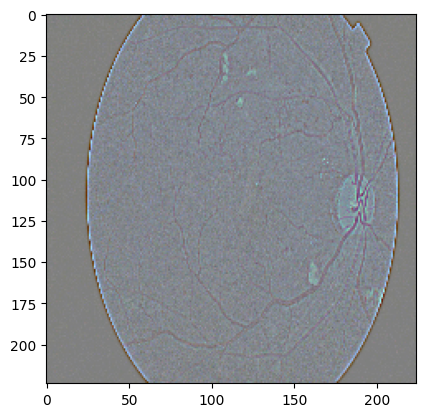

In [ ]:
index =5
predictions=["Mild","Moderate","NO_DR","Proliferate_DR","Severe"]

img = x_test[index]
RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
RGBImg= cv2.resize(RGBImg,(224,224))

plt.imshow(RGBImg)
print(y_test[index]) # true
print(f"Prediction: {predictions[pred[index]]}") # predicted

In [ ]:
import cv2

def predict_new(path):
    img = cv2.imread(path)

    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0

    predict=model.predict(np.array([image]))
    pred=np.argmax(predict,axis=1)

    print(f"Predicted: {predictions[pred[0]]}")

1/1 [==============================] - 1s 1s/step
Predicted: NO_DR


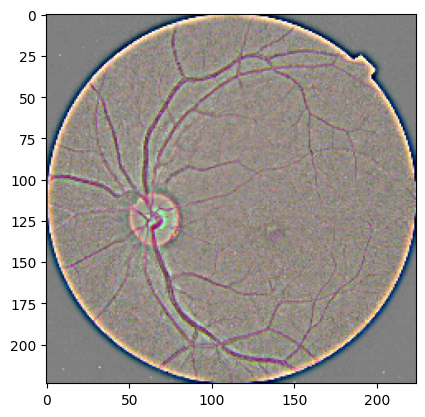

In [ ]:
predict_new("/content/sample_data/gaussian_filtered_images/gaussian_filtered_images/No_DR/002c21358ce6.png")
#True --> Mild